# Python Workshop 3: The NumPy Workshop

## 0. Recap of workshop 2: Data Structures & Object-Oriented Programming (OOP)

**If you missed the previous workshop,** go back to the repository to find the Workshop 2.

Or hear me talk for 10 minutes :3

### Data Structures

**Lists, Tuples, Sets, and Dictionaries** are the core data structures in Python, each useful for storing and managing collections of data.

- **Lists** are ordered, mutable collections. You can add, remove, or change items.

In [1]:
fruits = ["apple", "banana", "cherry"]
fruits.append("orange")
print(fruits)  # ['apple', 'banana', 'cherry', 'orange']

['apple', 'banana', 'cherry', 'orange']


- **Tuples** are like lists, but immutable—once you create them, they can’t be changed.

In [2]:
coordinates = (10, 20)
# coordinates[0] = 15  # This would raise an error: TypeError: 'tuple' object does not support item assignment
print(coordinates)  # (10, 20)

(10, 20)


- **Sets** are unordered collections with no duplicates, useful for checking membership or uniqueness.

In [3]:
unique_numbers = {1, 2, 3, 2}
print(unique_numbers)  # {1, 2, 3}

{1, 2, 3}


- **Dictionaries** store key-value pairs, useful for looking up data based on unique keys.

In [4]:
student = {"name": "Lumi", "age": 22}
print(student["name"])  # Lumi

Lumi


### Object-Oriented Programming (OOP)

OOP helps us create **classes** that bundle related data (attributes) and functions (methods) together, offering better code organization and reuse.

- **Classes** define a blueprint for creating objects.


- **Encapsulation**: Hides internal details. Use methods to interact with object data safely.

In [5]:
class Dog:
    def __init__(self, name):
        self.name = name
        
    def bark(self):
        return f"{self.name} says Woof!"
    
my_dog = Dog("Rex")
print(my_dog.bark())  # Rex says Woof!

Rex says Woof!


- **Inheritance**: One class can inherit attributes and methods from another, promoting code reuse.


- **Polymorphism**: Different classes can share the same method names but implement them differently.

In [6]:
class Animal:
    def __init__(self, name):
        self.name = name

    def speak(self):
        pass

class Dog(Animal):
    def speak(self):
        return f"{self.name} says Woof!"

class Cat(Animal):
    def speak(self):
        return f"{self.name} says Meow!"

# Polymorphism
animals = [Dog("Rex"), Cat("Whiskers")]

for animal in animals:
    print(animal.speak())

Rex says Woof!
Whiskers says Meow!


## 1. Introduction of NumPy

### Installing and importing NumPy

In [7]:
pip install numpy

In [8]:
import numpy as np

### What is NumPy?

NumPy is an optimized Python library for scientific computing that efficiently handles large multidimensional arrays and matrices. It provides fast, vectorized operations and a variety of mathematical functions, enabling improved performance over traditional Python lists. With its core data structure, the `ndarray`, NumPy allows for efficient storage and computation of homogeneous data types, making it essential for data analysis and numerical calculations in Python.

The following code demonstrates the performance advantage of NumPy by comparing the execution time of summing large datasets using native **Python lists** versus **NumPy arrays**.

In [9]:
import time
import numpy as np  # Import NumPy for numerical operations

def time_logger(func):
    """
    Decorator to log the execution time of a function.
    """
    def wrapper(*args, **kwargs):
        start_time = time.time()  # Start time
        result = func(*args, **kwargs)  # Call the function
        end_time = time.time()  # End time
        print(f"{func.__name__} took {end_time - start_time:.5f} seconds to execute.")
        return result  # Return the result
    return wrapper

@time_logger
def sum_native_python(numbers: list[int]) -> int:
    """Sums a list of numbers using native Python."""
    return sum(numbers)

@time_logger
def sum_numpy(numbers: np.array) -> np.float64:
    """Sums an array of numbers using NumPy."""
    return np.sum(numbers)

# Creating test data
large_list = list(range(1, 1000000))  # List of numbers from 1 to 999,999
large_array = np.array(large_list)  # Convert list to NumPy array

# Compare performance
print(type(large_list))  # Print type of the list
sum_native_python(large_list)  # Sum using native Python
print(type(large_array))  # Print type of the NumPy array
sum_numpy(large_array)  # Sum using NumPy

<class 'list'>
sum_native_python took 0.03500 seconds to execute.
<class 'numpy.ndarray'>
sum_numpy took 0.00300 seconds to execute.


1783293664

### Why is NumPy Faster?
- Implementation of the data structure is often written done in C


- In NumPy, operations are vectorized (meaning that they operate on entire arrays at once, rather than element by element), whereas native Python iterates over elements, which is inherently slower.


- Numpy uses Dynamic Arrays where each element is stored contiguously (in other words write next to each other in memory). Python lists use an Array of pointers which means the machine has to follow each pointer to where the data is stored.

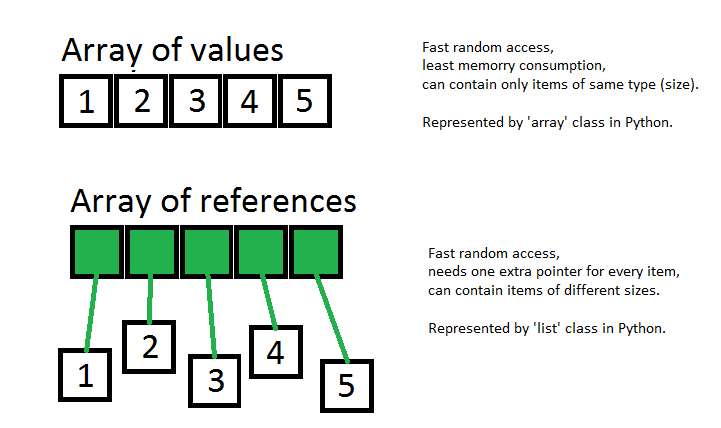

### What is a 'NumPy Array'?

In computer programming, an array is a structure for storing and retrieving data.

In NumPy, this idea is generalized to an arbitrary number of dimensions, and so the fundamental array class is called `ndarray`: it represents an "N-dimensional array".

The NumPy "N-dimensional array" object, `ndarray`, has several important attributes that provide information about the array's structure and data including `ndim`, `shape`, `size` and `dtype`.

Let's create an array first, we will talk about the approach to create one later.

In [10]:
array = np.array([[1, 2, 3, 4, 5, 6],[7, 8, 9, 10, 11, 12]])
array

array([[ 1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12]])

The number of dimensions of an array is contained in the `ndim` attribute.

In [11]:
array.ndim

2

The `shape` of an array is a tuple of non-negative integers that specify the number of elements along each dimension.

In [12]:
array.shape #(2, 6)

(2, 6)

In [13]:
len(array.shape) == array.ndim #True

True

The fixed, total number of elements in array is contained in the `size` attribute.

In [14]:
array.size #12

12

In [15]:
import math
# math.prod() method returns the product of the elements from the given iterable
array.size == math.prod(array.shape) #True

True

Arrays are typically “homogeneous”, meaning that they contain elements of only one “data type”. The data type is recorded in the `dtype` attribute.

In [16]:
array.dtype # "int" for integer, "32" for 32-bit

dtype('int32')

### How to create a basic array
There are several ways to create arrays.

For example, you can create an array(a ndarray object) from a regular Python list or tuple using the `array()` function like the above. The type of the resulting array is deduced from the type of the elements in the sequences.

In [17]:
a = np.array([1, 2, 3])

In [18]:
a.dtype

dtype('int32')

In [19]:
b = np.array([1.2, 3.5, 5.1])

In [20]:
b.dtype

dtype('float64')

Besides creating an array from a sequence of elements, you can easily create an array filled with `0`’s specifying the shape by inputting a number or tuple:

In [21]:
np.zeros((3, 4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

Or an array filled with `1`’s:

In [22]:
np.ones((3, 4))

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

To create sequences of numbers, NumPy provides the `arange()` function which is analogous to the Python built-in range, but returns an array.

In [23]:
np.arange(10, 30, 5) # Generates a 1D array with values starting from 10, up to (but not including) 30, with a step of 5

array([10, 15, 20, 25])

In [24]:
np.arange(0, 2, 0.3)  # it accepts float arguments

array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8])

When `arange()` is used with floating point arguments, it is generally not possible to predict the number of elements obtained, due to the finite floating point precision. 

For this reason, it is usually better to use the function `linspace()` that receives as an argument the number of elements that we want, instead of the step:

In [25]:
np.linspace(0, 2, 9) # 9 numbers from 0 to 2

array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  ])

You can create an array of a specified size filled with random numbers uniformly distributed between 0 and 1 using `random.random()`

In [26]:
np.random.random((6, 2)) # Generates a 6x2 array of random floats between 0 and 1

array([[0.54023014, 0.49746939],
       [0.1401081 , 0.00636515],
       [0.03889312, 0.8877046 ],
       [0.88636739, 0.73570177],
       [0.9020145 , 0.16000497],
       [0.4505672 , 0.6579213 ]])

You can also create an array of a specified size filled with random numbers that follow standard normal distribution (mean 0 and variance 1) using `random.randn()`.

In [27]:
np.random.randn(6,2) # Generates a 6x2 array of random numbers from a standard normal distribution (mean=0, variance=1)

array([[ 0.11623124, -1.01415083],
       [-0.68885928, -0.29284135],
       [-0.28002148, -1.65259302],
       [ 0.68857119, -1.50829316],
       [ 0.57851182,  1.80315378],
       [ 0.25837522,  1.42798877]])

Eventually, you can create an array using np.fromfunction, which allows you to generate values based on their indices. This function executes a specified function over each coordinate in the desired shape, making it a powerful tool for generating structured arrays without needing to write explicit loops.

In [28]:
def f(x, y):
    return 10 * x + y

b = np.fromfunction(f, (5, 4), dtype=int)
b

array([[ 0,  1,  2,  3],
       [10, 11, 12, 13],
       [20, 21, 22, 23],
       [30, 31, 32, 33],
       [40, 41, 42, 43]])

### Basic Arithmetic Operations

Arithmetic operators on arrays apply elementwise. A new array is created and filled with the result.

In [29]:
a = np.array([20, 30, 40, 50])
b = np.arange(4)
c = a - b # Subtracts array 'b' from array 'a' element-wise and stores the result in array 'c'
c # array([20, 29, 38, 47])

array([20, 29, 38, 47])

In [30]:
b**2 # Squares each element in the array 'b'

array([0, 1, 4, 9], dtype=int32)

In [31]:
10 * np.sin(a) # Multiplies each element in the array 'a' by 10, after applying the sine function

array([ 9.12945251, -9.88031624,  7.4511316 , -2.62374854])

In [32]:
a < 35 # Returns a boolean array where each element indicates whether the corresponding element in array 'a' is less than 35

array([ True,  True, False, False])

Unlike in many matrix languages, the product operator `*` operates elementwise in NumPy arrays. The matrix product can be performed using the `@` operator (in python >=3.5) or the `dot` function or method:

In [33]:
A = np.array([[1, 1],
              [0, 1]])
B = np.array([[2, 0],
              [3, 4]])
A * B     # elementwise product

array([[2, 0],
       [0, 4]])

In [34]:
A @ B     # matrix product

array([[5, 4],
       [3, 4]])

In [35]:
# Checks if matrix multiplication using '@' operator and 'dot()' method for arrays A and B are equivalent
# And returns True if all elements are the same
(A @ B == A.dot(B)).all()

True

Some operations, such as `+=` and `*=`, act in place to modify an existing array rather than create a new one.

In [36]:
# Create an instance of the default random number generator
np.random.seed(42)

# Initialize arrays 'a' and 'b'
a = np.ones((2, 3), dtype=int)  # Array of ones (2x3), dtype=int
b = np.random.random((2, 3))  # Array of random floats (2x3)

# Multiply each element in 'a' by 3
a *= 3
print("Array 'a' after multiplying by 3:\n", a)

# Add 'a' to 'b' element-wise
b += a
print("\nArray 'b' after adding 'a':\n", b)

# Try to add 'b' to 'a' (this will raise an error because the data types don't match)
try:
    a += b
except TypeError as e:
    print("\nError when adding 'b' to 'a':", e)

# Final values of 'a' and 'b'
print("\nFinal values:")
print("Array 'a':\n", a)
print("Array 'b':\n", b)

Array 'a' after multiplying by 3:
 [[3 3 3]
 [3 3 3]]

Array 'b' after adding 'a':
 [[3.37454012 3.95071431 3.73199394]
 [3.59865848 3.15601864 3.15599452]]

Error when adding 'b' to 'a': Cannot cast ufunc 'add' output from dtype('float64') to dtype('int32') with casting rule 'same_kind'

Final values:
Array 'a':
 [[3 3 3]
 [3 3 3]]
Array 'b':
 [[3.37454012 3.95071431 3.73199394]
 [3.59865848 3.15601864 3.15599452]]


When operating with arrays of different types, the type of the resulting array corresponds to the more general or precise one (a behavior known as upcasting).

In [37]:
a = np.ones(3, dtype=np.int32)
b = np.linspace(0, 1, 3)
b.dtype.name

'float64'

In [38]:
c = a + b
c.dtype.name

'float64'

In [39]:
d = c * 1j
d.dtype.name

'complex128'

### Broadcasting

Broadcasting in NumPy refers to how arrays with different shapes are handled during arithmetic operations. 

Under certain conditions, a smaller array is "broadcast" across a larger array to make their shapes compatible. This allows for vectorized operations, enabling faster computation in C rather than slower Python loops, without unnecessary data copies. 

Typically, NumPy operations are performed element-wise on pairs of arrays.

### Broadcasting Rule:

Here are the broadcasting rules in NumPy:

1. **Dimension Compatibility**: Two arrays can be broadcast together if their dimensions are compatible. This is true when:
   - The dimensions are equal, or
   
   - One of the dimensions is 1 (the smaller array can be stretched to match the larger array's dimension).
   

2. **Aligning Dimensions**: If the arrays have different numbers of dimensions, the shape of the smaller array is padded with ones on the left side until both shapes are the same length.

3. **Broadcasting**:
   - If the dimensions of the two arrays are the same, they can be broadcast together.
   
   - If one of the dimensions is 1, that dimension is stretched to match the other dimension.
   
   - If a dimension is missing in one array (because it has fewer dimensions), it is treated as having a size of 1 for broadcasting purposes.


4. **Resulting Shape**: The resulting shape of the broadcasted array will be the maximum size along each dimension from the input arrays.

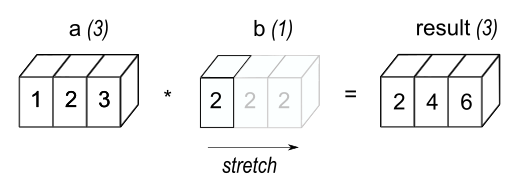

In [40]:
a = np.array([1.0, 2.0, 3.0])
b = 2.0
a * b

array([2., 4., 6.])

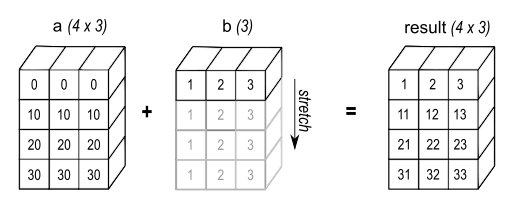

In [41]:
a = np.array([[ 0.0,  0.0,  0.0],
              [10.0, 10.0, 10.0],
              [20.0, 20.0, 20.0],
              [30.0, 30.0, 30.0]])
b = np.array([1.0, 2.0, 3.0])
a + b

array([[ 1.,  2.,  3.],
       [11., 12., 13.],
       [21., 22., 23.],
       [31., 32., 33.]])

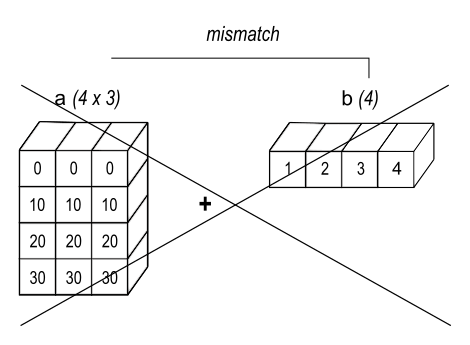

In [42]:
b = np.array([1.0, 2.0, 3.0, 4.0])
try:
    a + b
except ValueError as e:
    print("\nError when adding 'b' to 'a':", e)


Error when adding 'b' to 'a': operands could not be broadcast together with shapes (4,3) (4,) 


### Universal functions

NumPy provides familiar mathematical functions such as `sin`, `cos`, and `exp`. In NumPy, these are called “universal functions” (ufunc). Within NumPy, these functions operate elementwise on an array, producing an array as output.

In [43]:
B = np.arange(3)
B

array([0, 1, 2])

In [44]:
np.exp(B)

array([1.        , 2.71828183, 7.3890561 ])

In [45]:
np.sqrt(B)

array([0.        , 1.        , 1.41421356])

### Statistical Operation
Statistical functions in NumPy are essential for data analysis. They include functions like `sum()`, `mean()`, `median()`, `std()`, `var()`, `min()`, `max()`, `argmin()`, `argmax()`, `cumsum()`, and more. These functions allow you to perform operations such as summing, averaging, finding standard deviation, variance, minimum, maximum, and cumulative sums on array elements. Refer to the code below for examples.

In [46]:
dataset = np.random.normal(50, 10, (10,10))

In [47]:
dataset.sum()

4848.162276404988

In [48]:
dataset.mean()

48.48162276404988

In [49]:
dataset.std()

8.968898413031903

By default, these operations apply to the array as though it were a list of numbers, regardless of its shape. However, by specifying the axis parameter you can apply an operation along the specified axis of an array:

In [50]:
dataset.sum(axis=0) #column sum

array([495.5095476 , 515.39951736, 472.97308575, 458.93920431,
       498.073313  , 532.0454796 , 487.9438839 , 446.35060631,
       449.36615138, 491.56148719])

In [51]:
dataset.mean(axis=0) #column mean

array([49.55095476, 51.53995174, 47.29730858, 45.89392043, 49.8073313 ,
       53.20454796, 48.79438839, 44.63506063, 44.93661514, 49.15614872])

In [52]:
dataset.std(axis=0) #column std

array([ 8.19931161,  8.31736065,  5.55606561,  9.73237224,  7.61101384,
        8.05749777,  6.64025537,  9.64079372, 11.39743887,  9.05813674])

In [53]:
dataset.cumsum(axis=1) #row cumulative sum

array([[ 65.79212816, 123.46647545, 168.77173159, 224.19733202,
        269.56315509, 314.90585756, 367.32548027, 398.19267783,
        430.9434995 , 475.32062421],
       [ 39.8716888 ,  93.01416212, 133.93392137, 169.81088435,
        234.46737204, 282.20960904, 332.88489109, 368.63740922,
        413.19358198, 464.30280787],
       [ 38.49006423,  92.24704441, 136.24065751, 183.32372001,
        227.30665389, 295.82943573, 345.69446349, 385.1173542 ,
        443.34280332, 481.13436682],
       [ 52.08863595,  82.49193471, 119.21007422, 171.17868658,
        228.56335238, 280.27703519, 329.12055237, 376.10951541,
        411.32429551, 454.12585343],
       [ 45.39361229, 105.96483455, 159.40101745, 191.77061589,
        245.01145559, 291.16063278, 334.39141278, 390.50817567,
        450.81817089, 510.13097209],
       [ 41.60782477,  88.51570101, 141.82833532, 201.58378659,
        246.79204422, 294.93545445, 333.87210471, 371.91003847,
        430.03529669, 493.59769698],
       [ 4

### Indexing, slicing and iterating

One-dimensional arrays can be indexed, sliced and iterated over, much like lists and other Python sequences.

In [54]:
a = np.arange(10)**3

In [55]:
a[2]

8

In [56]:
a[2:5]

array([ 8, 27, 64], dtype=int32)

In [57]:
a[:6:2] = 1000 #equivalent to a[0:6:2]
a

array([1000,    1, 1000,   27, 1000,  125,  216,  343,  512,  729],
      dtype=int32)

In [58]:
a[::-1]  # reversed a

array([ 729,  512,  343,  216,  125, 1000,   27, 1000,    1, 1000],
      dtype=int32)

In [59]:
for i in a:
    print(np.ceil(i**(1 / 3.)))

10.0
1.0
10.0
3.0
10.0
5.0
6.0
7.0
8.0
9.0


Multidimensional arrays can have one index per axis. These indices are given in a tuple separated by commas:

In [60]:
def f(x, y):
    return 10 * x + y

b = np.fromfunction(f, (5, 4), dtype=int)
b

array([[ 0,  1,  2,  3],
       [10, 11, 12, 13],
       [20, 21, 22, 23],
       [30, 31, 32, 33],
       [40, 41, 42, 43]])

In [61]:
b[2, 3]

23

In [62]:
b[0:5, 1]  # each row in the second column of b

array([ 1, 11, 21, 31, 41])

In [63]:
b[1:3, :]  # each column in the second and third row of b

array([[10, 11, 12, 13],
       [20, 21, 22, 23]])

When fewer indices are provided than the number of axes, the missing indices are considered complete slices:

In [64]:
b[-1]   # the last row. Equivalent to b[-1, :]

array([40, 41, 42, 43])

The expression within brackets in `b[i]` is treated as an i followed by as many instances of `:` as needed to represent the remaining axes. NumPy also allows you to write this using dots as `b[i, ...]`.


The **dots** (`...`) represent as many colons as needed to produce a complete indexing tuple. For example, if `x` is an array with 5 axes, then:

- `x[1, 2, ...]` is equivalent to `x[1, 2, :, :, :]`
- `x[..., 3]` is equivalent to `x[:, :, :, :, 3]`
- `x[4, ..., 5, :]` is equivalent to `x[4, :, :, 5, :]`

In [65]:
c = np.array([[[  0,  1,  2],  # a 3D array (two stacked 2D arrays)
               [ 10, 12, 13]],
              [[100, 101, 102],
               [110, 112, 113]]])
c.shape

(2, 2, 3)

In [66]:
c[1, ...]  # same as c[1, :, :] or c[1]

array([[100, 101, 102],
       [110, 112, 113]])

In [67]:
c[..., 2]  # same as c[:, :, 2]

array([[  2,  13],
       [102, 113]])

Iterating over multidimensional arrays is done with respect to the first axis:

In [68]:
for row in b:
    print(row)

[0 1 2 3]
[10 11 12 13]
[20 21 22 23]
[30 31 32 33]
[40 41 42 43]


### Changing the shape of an array
The shape of an array can be changed with various commands:

- **Flattening**: `ravel()` function transforms a multi-dimensional array into a one-dimensional array. It essentially takes all the elements and lays them out in a single row, preserving the order of the elements. The resulting array contains the same data but in a flattened format.

- **Reshaping**: `reshape()` function allows you to change the structure of the array without altering its data. You can specify new dimensions, and as long as the total number of elements remains the same, it will rearrange the elements into the new shape. For example, if you have an array with 12 elements, you can reshape it to have 6 rows and 2 columns.

- **Transposing**: `T` gives the swap of rows and columns of the array. Essentially, the element at position (i, j) in the original array will be located at position (j, i) in the transposed array. This operation is particularly useful in linear algebra and certain data manipulation tasks.

Note that these three commands all return a modified array, but do not change the original array:

In [69]:
a = np.floor(10 * np.random.random((3, 4)))
a

array([[5., 7., 3., 9.],
       [9., 2., 4., 3.],
       [2., 0., 6., 5.]])

In [70]:
a.ravel()

array([5., 7., 3., 9., 9., 2., 4., 3., 2., 0., 6., 5.])

In [71]:
a.reshape(6, 2)  # returns the array with a modified shape

array([[5., 7.],
       [3., 9.],
       [9., 2.],
       [4., 3.],
       [2., 0.],
       [6., 5.]])

In [72]:
a.T  # returns the array, transposed

array([[5., 9., 2.],
       [7., 2., 0.],
       [3., 4., 6.],
       [9., 3., 5.]])

The `reshape()` function returns its argument with a modified shape, whereas the `ndarray.resize` method modifies the array itself:

In [73]:
a.resize((2, 6))
a

array([[5., 7., 3., 9., 9., 2.],
       [4., 3., 2., 0., 6., 5.]])

If a dimension is given as -1 in a reshaping operation, the other dimensions are automatically calculated:

In [74]:
a.reshape(3, -1) # same as a.reshape(3, 4)

array([[5., 7., 3., 9.],
       [9., 2., 4., 3.],
       [2., 0., 6., 5.]])

### Stacking together different arrays

Several arrays can be stacked together along different axes:

In [75]:
a = np.floor(10 * np.random.random((2, 2)))
b = np.floor(10 * np.random.random((2, 2)))

In [76]:
# Stack arrays 'a' and 'b' vertically (row-wise) to create a new array
np.vstack((a, b))

array([[0., 2.],
       [9., 2.],
       [1., 4.],
       [9., 2.]])

In [77]:
# Stack arrays 'a' and 'b' horizontally (column-wise) to create a new array
np.hstack((a, b))

array([[0., 2., 1., 4.],
       [9., 2., 9., 2.]])

In [78]:
# Same as np.vstack((a, b))
np.concatenate((a, b),axis = 0)

array([[0., 2.],
       [9., 2.],
       [1., 4.],
       [9., 2.]])

In [79]:
# Same as np.hstack((a, b))
np.concatenate((a, b),axis = 1)

array([[0., 2., 1., 4.],
       [9., 2., 9., 2.]])

In general, for arrays with more than two dimensions, `hstack` stacks along their second axes, `vstack` stacks along their first axes, and `concatenate` allows for an optional arguments giving the number of the axis along which the concatenation should happen.

### Splitting one array into several smaller ones

Using `hsplit`, you can split an array along its horizontal axis, either by specifying the number of equally shaped arrays to return, or by specifying the columns after which the division should occur:

In [80]:
a = np.floor(10 * np.random.random((2, 12)))
a

array([[6., 7., 2., 7., 3., 6., 6., 5., 0., 8., 3., 1.],
       [0., 5., 6., 0., 5., 2., 6., 1., 6., 3., 9., 1.]])

In [81]:
# Split `a` into 3 arrays
np.hsplit(a, 3)

[array([[6., 7., 2., 7.],
        [0., 5., 6., 0.]]),
 array([[3., 6., 6., 5.],
        [5., 2., 6., 1.]]),
 array([[0., 8., 3., 1.],
        [6., 3., 9., 1.]])]

In [85]:
# Split `a` after the third and the fourth column
np.hsplit(a, (3, 4))

[array([[6., 7., 2.],
        [0., 5., 6.]]),
 array([[7.],
        [0.]]),
 array([[3., 6., 6., 5., 0., 8., 3., 1.],
        [5., 2., 6., 1., 6., 3., 9., 1.]])]

`vsplit` splits along the vertical axis, and `array_split` allows one to specify along which axis to split.

### Copies and views
When operating and manipulating arrays, their data is sometimes copied into a new array and sometimes not. This is often a source of confusion for beginners. There are three cases:

- No copy at all

- Shallow copy (or view copy)

- Deep copy

### No copy at all

Simple assignments make no copy of objects or their data.

In [86]:
a = np.array([[ 0,  1,  2,  3],
              [ 4,  5,  6,  7],
              [ 8,  9, 10, 11]])
b = a            # no new object is created
b is a           # a and b are two names for the same ndarray object, so true

True

### View or shallow copy

Different array objects can share the same data. The view method creates a new array object that looks at the same data.

In [87]:
c = a.view()           # Create a view of array 'a' and assign it to 'c'
c is a                 # Because 'c' is a new array object

False

In [88]:
c.base is a            # c is a view of the data owned by a

True

In [89]:
c.flags.owndata

False

In [90]:
c = c.reshape((2, 6))  # a's shape doesn't change
a.shape

(3, 4)

In [93]:
c[0, 4] = 1234         # a's data changes
a

array([[   0,    1,    2,    3],
       [1234,    5,    6,    7],
       [   8,    9,   10,   11]])

### Deep copy

The copy method makes a complete copy of the array and its data.

In [97]:
d = a.copy()  # a new array object with new data is created
d is a

False

In [98]:
d.base is a  # d doesn't share anything with a

False

In [99]:
d[0, 0] = 9999
d

array([[9999,    1,    2,    3],
       [1234,    5,    6,    7],
       [   8,    9,   10,   11]])

In [100]:
a

array([[   0,    1,    2,    3],
       [1234,    5,    6,    7],
       [   8,    9,   10,   11]])

## 2. NumPy functions and methods overview

Here's the list of all some useful NumPy functions and methods names ordered in categories:

### Array Creation
``arange``, ``array``, ``copy``, ``empty``, ``empty_like``, ``eye``, ``fromfile``, ``fromfunction``, ``identity``, ``linspace``, ``logspace``, ``mgrid``, ``ogrid``, ``ones``, ``ones_like``, ``r_``, ``zeros``, ``zeros_like``

### Conversions
``ndarray.astype``, ``atleast_1d``, ``atleast_2d``, ``atleast_3d``, ``mat``

### Manipulations
``array_split``, ``column_stack``, ``concatenate``, ``diagonal``, ``dsplit``, ``dstack``, ``hsplit``, ``hstack``, ``ndarray.item``, ``newaxis``, ``ravel``, ``repeat``, ``reshape``, ``resize``, ``squeeze``, ``swapaxes``, ``take``, ``transpose``, ``vsplit``, ``vstack``

### Questions
``all``, ``any``, ``nonzero``, ``where``

### Ordering
``argmax``, ``argmin``, ``argsort``, ``max``, ``min``, ``ptp``, ``searchsorted``, ``sort``

### Operations
``choose``, ``compress``, ``cumprod``, ``cumsum``, ``inner``, ``ndarray.fill``, ``imag``, ``prod``, ``put``, ``putmask``, ``real``, ``sum``

### Basic Statistics
``cov``, ``mean``, ``std``, ``var``

### Basic Linear Algebra
``cross``, ``dot``, ``outer``, ``linalg.svd``, ``vdot``